### IMPORTING LIBRARIES AND DATA

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\jnyam\Documents\Instacart Basket Analysis'

In [3]:
df_ord_prods_cust = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ord_prods_cust_9.1.pkl'))

In [4]:
df_ord_prods_cust.shape

(32404859, 34)

### PROJECT KEY QUESTIONS: 

### 1. The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

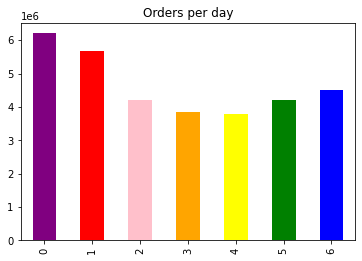

In [55]:
# The busies day of the week
orders_day_of_week = df_ord_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar(title = 'Orders per day', color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [6]:
orders_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_day_of_week.png'))

In [7]:
crosstab_day_week = pd.crosstab(df_ord_prods_cust['orders_day_of_week'], df_ord_prods_cust['busiest_day'], dropna = False )

In [8]:
crosstab_day_week

busiest_day,Busiest day,Least busy,Regularly busy
orders_day_of_week,,,
0,6204182,0,0
1,0,0,5660230
2,0,0,4213830
3,0,0,3840534
4,0,3783802,0
5,0,0,4205791
6,0,0,4496490


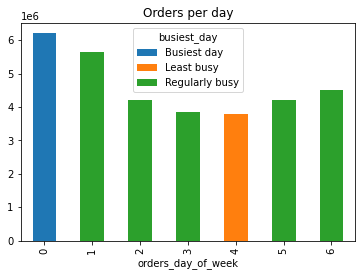

In [9]:
crosstab_day_week = crosstab_day_week.plot(kind = 'bar', stacked = True, title = 'Orders per day')

In [10]:
crosstab_day_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_day_week.png'))

### 2.They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

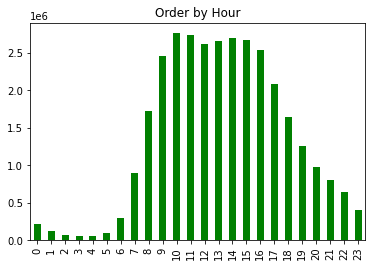

In [11]:
# The busies hour of the day
order_by_hour = df_ord_prods_cust['order_hour_of_day'].value_counts().sort_index().plot.bar(color = 'green', title = 'Order by Hour')

In [12]:
order_by_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_by_hour.png'))

In [13]:
crosstab_hour_day = pd.crosstab(df_ord_prods_cust['order_hour_of_day'], df_ord_prods_cust['busiest_day'], dropna = False )

In [14]:
crosstab_hour_day

busiest_day,Busiest day,Least busy,Regularly busy
order_hour_of_day,,,
0,38841,24701,155227
1,22501,13518,79681
2,12715,7972,48688
3,8846,6328,36107
4,8367,6916,37959
5,11619,11992,64350
6,34950,39794,215749
7,133248,113397,644409
8,306184,193955,1217979


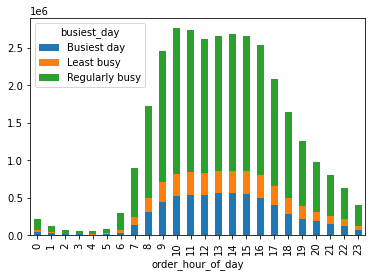

In [15]:
crosstab_hour_day = crosstab_hour_day.plot(kind = 'bar', stacked = True)

In [16]:
crosstab_day_spending = pd.crosstab(df_ord_prods_cust['orders_day_of_week'], df_ord_prods_cust['spending_flag'], dropna = False )

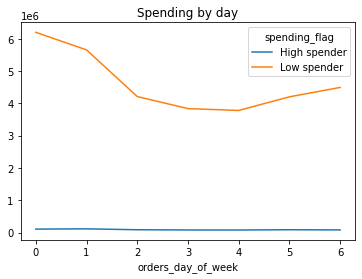

In [17]:
crosstab_day_spending = crosstab_day_spending.plot(kind = 'line', stacked = True, title = 'Spending by day')

In [18]:
crosstab_day_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_day_spending.png'))

In [19]:
df_ord_prods_cust.spending

0            6.367797
1            6.367797
2            6.367797
3            6.367797
4            6.367797
              ...    
32404854    10.700000
32404855     8.100000
32404856     8.100000
32404857     8.100000
32404858     8.100000
Name: spending, Length: 32404859, dtype: float64

### 3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

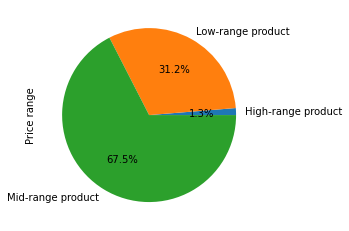

In [20]:
price_range_loc = df_ord_prods_cust['price_range_loc'].value_counts().sort_index().plot.pie(ylabel = 'Price range', autopct = '%1.1f%%')

In [21]:
price_range_loc.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_loc.png'))

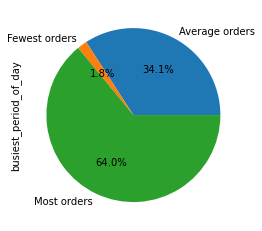

In [22]:
busiest_period_of_day = df_ord_prods_cust['busiest_period_of_day'].value_counts().sort_index().plot.pie(autopct = '%1.1f%%')

In [23]:
busiest_period_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busiest_period_of_day.png'))

### 4. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [61]:
df_ord_prods_cust['product_name'].value_counts(dropna = False)

Banana                                                    472565
Bag of Organic Bananas                                    379450
Organic Strawberries                                      264683
Organic Baby Spinach                                      241921
Organic Hass Avocado                                      213584
                                                           ...  
Deep Clean Cleanser & Mask                                     1
Glycerine Soap Cucumber                                        1
Pure Performance Restorative Shampoo Chamomile & Honey         1
Gluten Free Almond Snap Cookies                                1
Indian Wells Merlot                                            1
Name: product_name, Length: 49661, dtype: int64

In [63]:
crosstab_frequency = pd.crosstab(df_ord_prods_cust['department_id'], df_ord_prods_cust['frequency_flag'], dropna = False )

In [26]:
crosstab_frequency

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
department_id,,,
1,1395346,287232,552164
2,24080,4204,8007
3,782925,129647,259856
4,6463262,990592,2025435
5,103146,17685,32865
6,173918,33079,62256
7,1784868,304072,599183
8,59767,11925,26024
9,544124,111456,211047


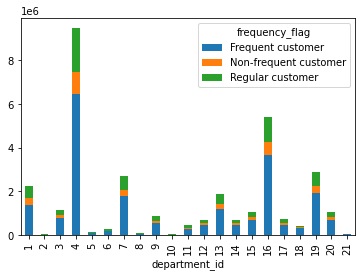

In [27]:
crosstab_frequency = crosstab_frequency.plot(kind = 'bar', stacked = True)

In [28]:
crosstab_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_frequency.png'))

### 5. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

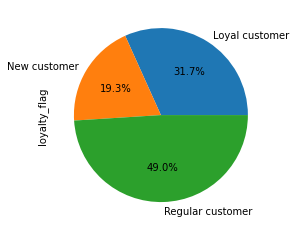

In [29]:
price_loyal = df_ord_prods_cust['loyalty_flag'].value_counts().sort_index().plot.pie(autopct = '%1.1f%%')

In [30]:
price_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_loyal.png'))

In [31]:
crosstab_fre_loy = pd.crosstab(df_ord_prods_cust['loyalty_flag'], df_ord_prods_cust['frequency_flag'], dropna = False )

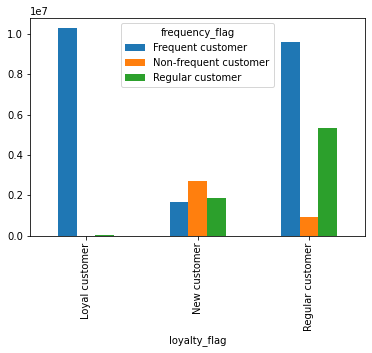

In [32]:
crosstab_fre_loy = crosstab_fre_loy.plot(kind = 'bar', stacked = False)

In [33]:
crosstab_fre_loy.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_fre_loy.png'), bbox_inches="tight")

In [68]:
crosstab_since_loy = pd.crosstab(df_ord_prods_cust['days_since_prior_order'], df_ord_prods_cust['loyalty_flag'], dropna = False )

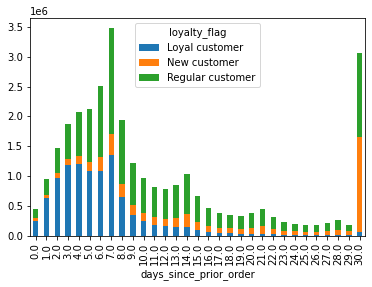

In [69]:
crosstab_since_loy = crosstab_since_loy.plot(kind = 'bar', stacked = True)

In [70]:
crosstab_since_loy.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_since_loy.png'), bbox_inches="tight")

In [34]:
df_ord_prods_cust.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
new_customer                  bool
product_id                 float64
add_to_cart_order          float64
reordered                  float64
_merge                    category
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
price_range_loc             object
busiest_day                 object
Busiest_day_two             object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
spending                   float64
spending_flag               object
frequency                  float64
frequency_flag              object
first_name                  object
last_name                   object
gender                      object
state               

### 6. Are there differences in ordering habits based on a customer’s loyalty status?

In [35]:
crosstab_loyal_spend = pd.crosstab(df_ord_prods_cust['loyalty_flag'], df_ord_prods_cust['spending_flag'], dropna = False )

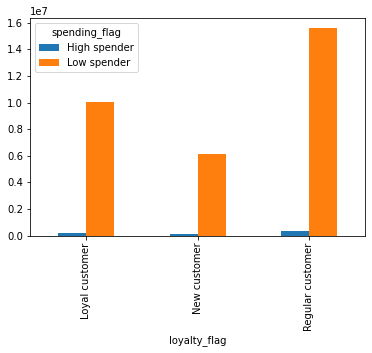

In [36]:
crosstab_loyal_spend = crosstab_loyal_spend.plot(kind = 'bar', stacked = False)

In [37]:
crosstab_loyal_spend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_loyal_spend.png'), bbox_inches="tight")

In [ ]:
crosstab_loyal_age = pd.crosstab(df_ord_prods_cust['loyalty_flag'], df_ord_prods_cust['age_group'], dropna = False )

In [ ]:
crosstab_loyal_age = crosstab_loyal_age.plot(kind = 'bar', stacked = False)

In [ ]:
crosstab_loyal_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_loyal_age.png'), bbox_inches="tight")

In [40]:
crosstab_loyal_gender = pd.crosstab(df_ord_prods_cust['loyalty_flag'], df_ord_prods_cust['gender'], dropna = False )

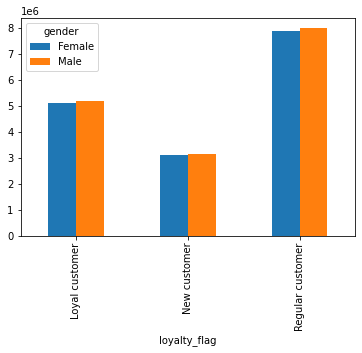

In [41]:
crosstab_loyal_gender = crosstab_loyal_gender.plot(kind = 'bar', stacked = False)

In [43]:
crosstab_loyal_gender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_loyal_gender.png'), bbox_inches="tight")

In [44]:
df_ord_prods_cust.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
new_customer                  bool
product_id                 float64
add_to_cart_order          float64
reordered                  float64
_merge                    category
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
price_range_loc             object
busiest_day                 object
Busiest_day_two             object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
spending                   float64
spending_flag               object
frequency                  float64
frequency_flag              object
first_name                  object
last_name                   object
gender                      object
state               

### GENDER

In [45]:
crosstab_gender = pd.crosstab(df_ord_prods_cust['gender'], df_ord_prods_cust['frequency_flag'], dropna = False )

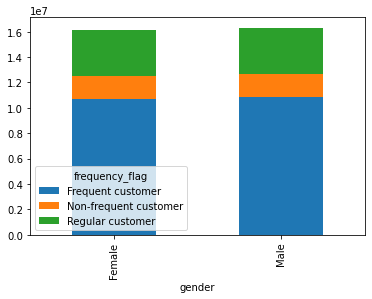

In [46]:
crosstab_gender = crosstab_gender.plot(kind = 'bar', stacked = True)

In [47]:
crosstab_gender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_gender.png'), bbox_inches="tight")

### -----------------------------REGION/FREGUENCY FLAG------------------------------------

In [ ]:
crosstab_region_fre = pd.crosstab(df_ord_prods_cust['region'], df_ord_prods_cust['frequency_flag'], dropna = False )                       

In [ ]:
crosstab_region_fre = crosstab_region_fre.plot(kind = 'line', stacked = True, title = 'Freguency by region')

In [ ]:
crosstab_region_fre.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_region_fre.png'), bbox_inches="tight")

### 7. Are there differences in ordering habits based on a customer’s region?

In [56]:
# Created on Part 1

### 8. Is there a connection between age and family status in terms of ordering habits?

In [57]:
# Created on Part 1

### 9. What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?


### 10.What differences can you find in ordering habits of different customer profiles?Consider the price of orders, the frequency of orders, the products customers areordering, and anything else you can think of.


In [59]:
#Answer is covering all part